# Projeto de Estatística II


## Parte I - Regressão Linear

-------------------------------

**Instruções:**

- A primeira parte do projeto engloba a avliação dos tópicos de regressão linear.
- Ela deve ser entregue até o dia 29/08/2022.(O prazo foi prorrogado)
- Para a entrega, salve seu notebook na pasta Projetos do nosso drive com o nome do notebook com o seguinte padrão: [primeiro nome]_[sobrenome]_projeto_estatistica_II_parteI.ipynb
- A avaliação será registrada nos notebooks em formato de comentários.
-------------------------------

O dataset 'cancer_EUA.csv' relaciona a taxa de mortalidade por câncer em alguns condados dos EUA e outras features destes condados.

-------------------------------

## Statistics Project II

## Part I - Linear Regression

**Instructions:**

- The first part of the project encompasses the evaluation of linear regression topics.
- It must be delivered by 08/29/2022.(deadline has been extended)
- For delivery, save your notebook in the Projects folder of our drive with the notebook name with the -following pattern: [first name]_[last name]_project_statistica_II_partI.ipynb
- Te evaluation will be recorded in the notebooks in comment format.

-------------------------------

The 'cancer_USA.csv' dataset lists the cancer mortality rate in some US counties and other features of these counties.

-------------------------------

Dicionário dos dados:

* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities

* avgAnnCount: Mean number of reported cases of cancer diagnosed annually

* avgDeathsPerYear: Mean number of reported mortalities due to cancer

* incidenceRate: Mean per capita (100,000) cancer diagoses

* medianIncome: Median income per county

* popEst2015: Population of county

* povertyPercent: Percent of populace in poverty

* studyPerCap: Per capita number of cancer-related clinical trials per county

* binnedInc: Median income per capita binned by decile

* MedianAge: Median age of county residents

* MedianAgeMale: Median age of male county residents

* MedianAgeFemale: Median age of female county residents

* Geography: County name

* AvgHouseholdSize: Mean household size of county

* PercentMarried: Percent of county residents who are married

* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

* PctEmployed16_Over: Percent of county residents ages 16 and over employed

* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

* PctPrivateCoverage: Percent of county residents with private health coverage

* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

* PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

* PctPublicCoverage: Percent of county residents with government-provided health coverage

* PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

* PctWhite: Percent of county residents who identify as White

* PctBlack: Percent of county residents who identify as Black

* PctAsian: Percent of county residents who identify as Asian

* PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

* PctMarriedHouseholds: Percent of married households

* BirthRate: Number of live births relative to number of women in county

O objetivo da primeira parte do projeto é criar um modelo linear para prever o target (TARGET_deathRate). Para isso, siga o passo a passo abaixo e apresente seus raciocínios e resultados. 

**The objective of the first part of the project is to create a linear model to predict the target (TARGET_deathRate). To do this, follow the steps below and present your reasoning and results.**

1. Antes de qualquer exploração dos dados, leia o dicionário dos dados e reflita sobre a feature que você acredita ser mais correlacionada com o target. (Sem medo de errar. Não existe certo ou errado nesta questão.)

    **Before any exploration of the data, read the data dictionary and reflect on the feature that you believe is most correlated with the target. (No fear of making mistakes. There is no right or wrong in this matter.)**

In [ ]:
R:Após uma breve análise na base de dados desse estudo de caso, assim como o seu dicionário, foi possível identificar que as colunas "avgAnnCount" e "avgDeathsPerYear" são as que mais aparentam estar próximas em relacionamento com o TARGET. Apesar de existirem N combinações e correlações que podemos criar/imaginar olhando o dicionário, as que acredito estarem mais diretamente ligadas são as colunas citadas anteriormente. Claro que aqui se trata de um informação muito superficial, dado que ainda não foi realizada nenhuma análise exploratória, entretando já se é possível de verificar que essas colunas quanto maior é o seu número reportado maior consequentemente se torna a taxa de morte por câncer.

2. Agora, realize um EDA na base de dados para entender mais sobre as features. Quais são suas conclusões?

    **Now, perform an EDA on the database to understand more about the features. What are your conclusions?**

In [36]:
#importando as principais bibliotecas para o projeto

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('cancer_database.csv', sep=';')

df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,"1397,0","890,7705285028013","164,9","489,8","61898,0","260131,0","11,2","499,7482038","(61494.5, 125635]","39,3",...,NaN,"41,6","32,9","14,0","81,78052858","2,594728333","4,821857102","1,843478533","52,85607588","6,118831029"
1,"173,0","669,0883630446194","161,3","411,6","48127,0","43269,0","18,6","23,11123437","(48021.6, 51046.4]","33,0",...,"53,8","43,6","31,1","15,3","89,22850915","0,969102455","2,246232585","3,741351531","45,37250044","4,333095578"
2,"102,0","744,0834616315638","174,7","349,7","49348,0","21026,0","14,6","47,56016361","(48021.6, 51046.4]","45,0",...,"43,5","34,9","42,1","21,1","90,9221902","0,739673391","0,465898175","2,747358309","54,44486837","3,729487817"
3,"427,0","953,7733391577932","194,8","430,4","44243,0","75882,0","17,1","342,6372526","(42724.4, 45201]","42,8",...,"40,3","35,0","45,3","25,0","91,74468649","0,782625968","1,16135867","1,362643183","51,02151448","4,603840773"
4,"57,0","646,1944378671657","144,4","350,1","49955,0","10321,0","12,5","0,0","(48021.6, 51046.4]","48,3",...,"43,9","35,1","44,0","22,7","94,10402393","0,270192029","0,665830358","0,492135482","54,02745995","6,796657382"


In [38]:
#algumas informações básicas das variáveis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   avgAnnCount              3047 non-null   object
 1   avgDeathsPerYear         3047 non-null   object
 2   TARGET_deathRate         3047 non-null   object
 3   incidenceRate            3047 non-null   object
 4   medIncome                3047 non-null   object
 5   popEst2015               3047 non-null   object
 6   povertyPercent           3047 non-null   object
 7   studyPerCap              3047 non-null   object
 8   binnedInc                3047 non-null   object
 9   MedianAge                3047 non-null   object
 10  MedianAgeMale            3047 non-null   object
 11  MedianAgeFemale          3047 non-null   object
 12  Geography                3047 non-null   object
 13  AvgHouseholdSize         3047 non-null   object
 14  PercentMarried           3047 non-null  

In [39]:
# Foi necessário dropa essas duas colunas referenciadas abaixo, pois estavam preenchidas com dois números, não sendo relevantes para a nossa análise neste estudo de caso e estavam gerando problemas ao tentar converter os dados de string para float.
# Não existe uma especificação de como esse preenchimento de dois números devem ser interpretados.

df = df.drop(['Geography', 'binnedInc'], axis=1)

In [40]:
# Todas as informações estão como string, neste caso é necessário fazer a conversão para float

for column in df.columns:
    df[column] = df[column].str.replace(',', '.')

df = df.astype(float)


# Algumas estatísticas do target, para melhor compreendermos

df['TARGET_deathRate'].describe()

count    3047.000000
mean      178.491008
std        27.629797
min        56.000000
25%       161.200000
50%       178.100000
75%       195.200000
max       293.900000
Name: TARGET_deathRate, dtype: float64

In [41]:
# Verificando se há dados nulos

vl_nulos = df.isnull().sum()

vl_nulos

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRat

In [42]:
# Analisando a relação de valores nulos em relação a quantidade de valores do dataset.

nulos_total = vl_nulos/df.shape[0]

nulos_total

avgAnnCount                0.000000
avgDeathsPerYear           0.000000
TARGET_deathRate           0.000000
incidenceRate              0.000000
medIncome                  0.000000
popEst2015                 0.000000
povertyPercent             0.000000
studyPerCap                0.000000
MedianAge                  0.000000
MedianAgeMale              0.000000
MedianAgeFemale            0.000000
AvgHouseholdSize           0.000000
PercentMarried             0.000000
PctNoHS18_24               0.000000
PctHS18_24                 0.000000
PctSomeCol18_24            0.749918
PctBachDeg18_24            0.000000
PctHS25_Over               0.000000
PctBachDeg25_Over          0.000000
PctEmployed16_Over         0.049885
PctUnemployed16_Over       0.000000
PctPrivateCoverage         0.000000
PctPrivateCoverageAlone    0.199869
PctEmpPrivCoverage         0.000000
PctPublicCoverage          0.000000
PctPublicCoverageAlone     0.000000
PctWhite                   0.000000
PctBlack                   0

In [43]:
# Verificando se existem dados duplicados

df.duplicated().sum()

0

<AxesSubplot:xlabel='TARGET_deathRate', ylabel='Count'>

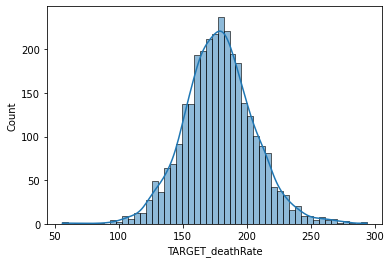

In [44]:
# Verificando a distribuição do target "TARGET_deathRate"

sns.histplot(data=df, x="TARGET_deathRate", kde=True)

<AxesSubplot:title={'center':'Mapa de calor da correlação variáveis'}>

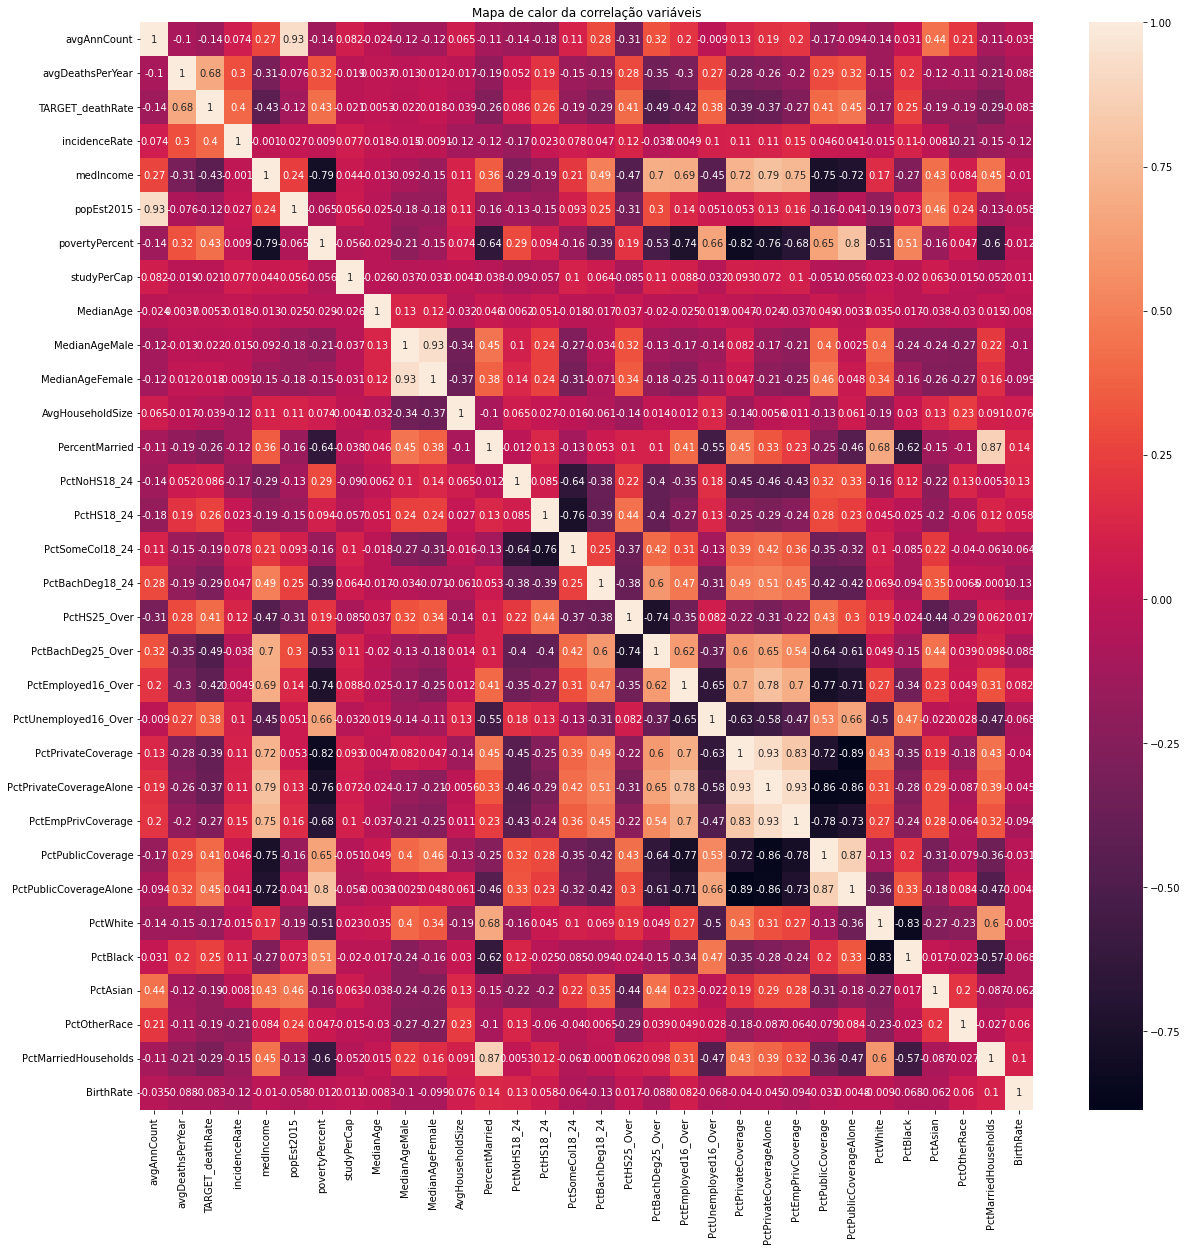

In [56]:
# Verificando correlação entre variáveis

plt.figure(figsize=(20,20))
plt.title('Mapa de calor da correlação variáveis')
sns.heatmap(df.corr(),annot=True)

In [65]:
# Verificando a correlação com o target/taxa de mortalidade

correlation_target = df.corr()['TARGET_deathRate'].abs().sort_values(ascending=False)
correlation_target = df.corr(method='spearman')
correlation_target

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,-0.087692,-0.085583,0.264905,0.346061,0.810315,-0.195880,0.508170,-0.239157,-0.244608,...,0.327338,0.391781,-0.250184,-0.153674,-0.182280,0.256661,0.561944,0.242279,-0.118769,-0.071837
avgDeathsPerYear,-0.087692,1.000000,0.672511,0.274470,-0.328660,-0.043376,0.327645,-0.087545,-0.006874,-0.011604,...,-0.265507,-0.199474,0.278845,0.322418,-0.093744,0.196736,-0.151574,-0.120319,-0.193525,-0.059738
TARGET_deathRate,-0.085583,0.672511,1.000000,0.407906,-0.463858,-0.044447,0.442435,-0.112687,0.008589,-0.004532,...,-0.380840,-0.277938,0.402365,0.453102,-0.101955,0.251542,-0.207830,-0.216924,-0.279620,-0.050487
incidenceRate,0.264905,0.274470,0.407906,1.000000,0.010581,0.186183,0.010033,0.162131,0.016922,0.008706,...,0.088534,0.149139,0.055506,0.061923,0.016076,0.148248,0.074805,-0.193443,-0.143357,-0.109322
medIncome,0.346061,-0.328660,-0.463858,0.010581,1.000000,0.309171,-0.884297,0.257010,-0.115359,-0.088881,...,0.826311,0.762987,-0.775501,-0.771309,0.142620,-0.181095,0.392710,0.171754,0.449515,0.010722
popEst2015,0.810315,-0.043376,-0.044447,0.186183,0.309171,1.000000,-0.083300,0.562972,-0.408627,-0.413663,...,0.275781,0.377017,-0.267908,-0.079885,-0.315032,0.397093,0.650939,0.325553,-0.178316,-0.128485
povertyPercent,-0.195880,0.327645,0.442435,0.010033,-0.884297,-0.083300,1.000000,-0.125192,-0.149297,-0.176155,...,-0.785989,-0.689713,0.672432,0.799011,-0.388881,0.372569,-0.193866,0.009973,-0.569439,-0.016751
studyPerCap,0.508170,-0.087545,-0.112687,0.162131,0.257010,0.562972,-0.125192,1.000000,-0.209913,-0.215712,...,0.266351,0.311131,-0.226975,-0.148084,-0.138454,0.173008,0.441604,0.165911,-0.164940,-0.091440
MedianAge,-0.239157,-0.006874,0.008589,0.016922,-0.115359,-0.408627,-0.149297,-0.209913,1.000000,0.963907,...,-0.167605,-0.225323,0.398952,0.042262,0.465274,-0.345085,-0.378985,-0.393692,0.186813,-0.127617
MedianAgeMale,-0.244608,-0.011604,-0.004532,0.008706,-0.088881,-0.413663,-0.176155,-0.215712,0.963907,1.000000,...,-0.150705,-0.201310,0.377849,0.023738,0.500831,-0.386403,-0.378768,-0.397665,0.221863,-0.135313


In [67]:
# Verificando e ordenando a correlação entre o target e as variáveis quando a valores absolutos

correlation_descending = correlation_target['TARGET_deathRate'].abs().sort_values(ascending=False)

correlation_descending

TARGET_deathRate           1.000000
avgDeathsPerYear           0.672511
PctBachDeg25_Over          0.501730
medIncome                  0.463858
PctPublicCoverageAlone     0.453102
povertyPercent             0.442435
PctEmployed16_Over         0.433174
PctHS25_Over               0.420579
PctPrivateCoverage         0.411319
incidenceRate              0.407906
PctUnemployed16_Over       0.402940
PctPublicCoverage          0.402365
PctPrivateCoverageAlone    0.380840
PctMarriedHouseholds       0.279620
PctEmpPrivCoverage         0.277938
PctHS18_24                 0.275896
PctBachDeg18_24            0.270316
PercentMarried             0.257257
PctBlack                   0.251542
PctOtherRace               0.216924
PctSomeCol18_24            0.212383
PctAsian                   0.207830
PctNoHS18_24               0.124543
studyPerCap                0.112687
PctWhite                   0.101955
avgAnnCount                0.085583
BirthRate                  0.050487
popEst2015                 0

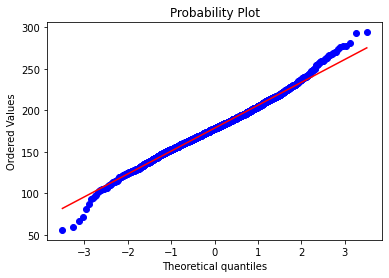

In [72]:
# Verificando o enviesamento

import pylab
from scipy import stats

df['TARGET_deathRate'].skew()

stats.probplot(df['TARGET_deathRate'], dist='norm', plot=pylab)
pylab.show()

In [73]:
# Verificando as colunas com correlação acima de 0.45

vl_col = correlation_descending[correlation_descending>0.45].index

vl_col

Index(['TARGET_deathRate', 'avgDeathsPerYear', 'PctBachDeg25_Over',
       'medIncome', 'PctPublicCoverageAlone'],
      dtype='object')

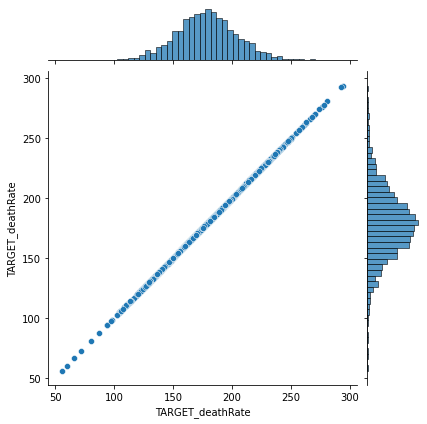

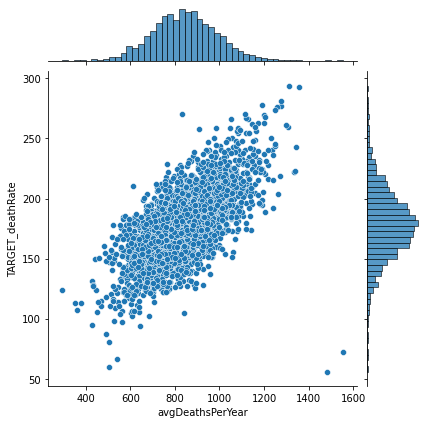

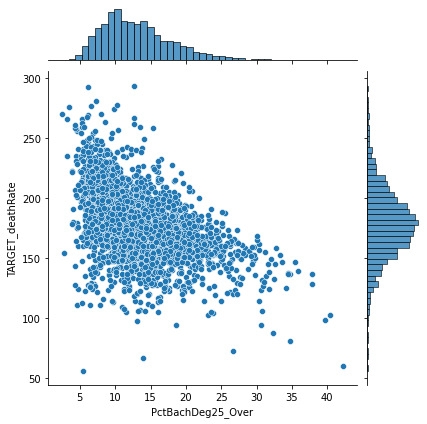

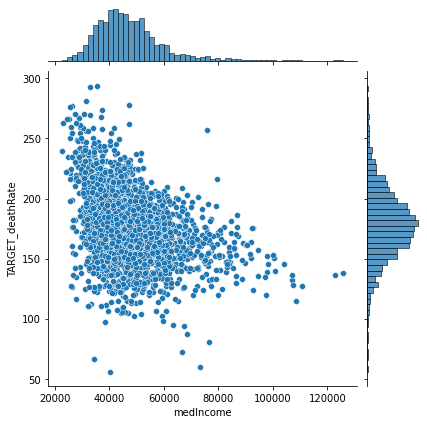

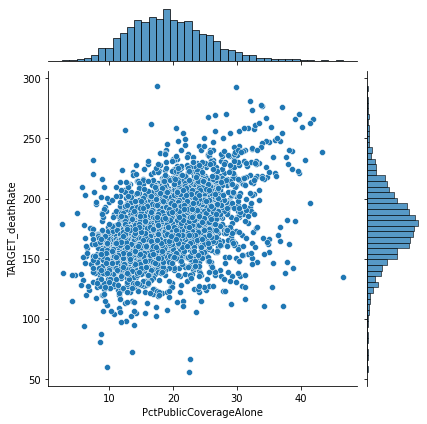

In [76]:
# Plot ds correlação entre o target e as variáveis com correlação acima de 0.45

for i in vl_col:
    sns.jointplot(data=df, x=i, y='TARGET_deathRate')
    plt.show()

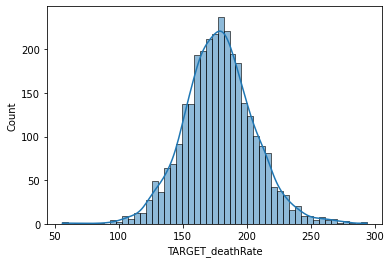

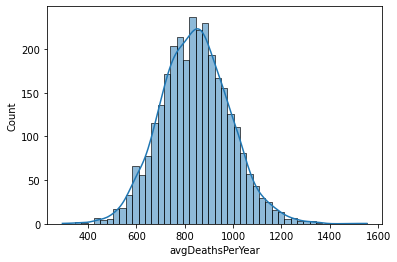

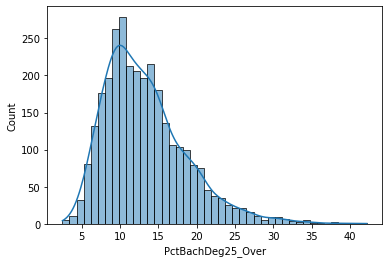

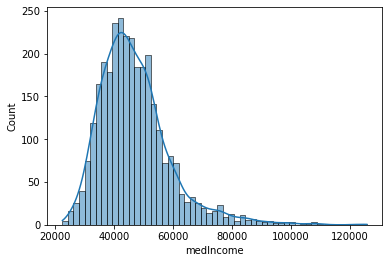

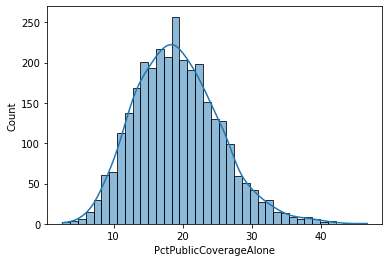

In [77]:
# Plot Da distribuição da variáveis com correlação acima de 0.45 

for i in vl_col:
    sns.histplot(data=df[i], kde=True)
    plt.show()

In [ ]:
O primeiro ponto da EDA como já de costume foi entender os dados que se tinha na nossa amostra. Foi visto que dentre todas as colunas do nosso dataset haviam algumas que apresentavam valores altos de não preenchimento, por exemplo a coluna "PctSomeCol18_24" possuia mais de setenta por cento dos seus dados nulos, assim como esta haviam algumas outras com um percentual menor do que este, mas ainda assim muito alto em relação ao total da base.

Outra tomada de decisão que tive ao estudar nossos dados foi que olhando para os mesmos foi possível perceber que em sua maioria continham valores númericos, se fazendo necessário realizar como parte da limpeza a conversão deste valores, assim como foi optado pela exclusão das colunas('Geography', 'binnedInc'), pois além de não conter uma especificação de como esse preenchimento de dois números deveriam ser interpretados, também como informado nos comentários da célula referente a essa exclusão, essas duas colunas estavam preenchidas com dois valores, não sendo eles relevantes para a nossa análise neste estudo de caso e estavam gerando problemas ao tentar converter os dados de string para float.

De modo geral o estudo de caso observado se mostrou com uma distribuição normal sobre os dados, onde as colunas do dataset possuem uma relação abaixo de cinquanta por cento de correlação, com excessão da coluna que referencia as mortes por ano.

3. Como o target está distribuído? Quais são as seus valores de média, mediana e variância? A distribuição é assimétrica?

    **How is the target distributed? What are your mean, median, and variance values? Is the distribution asymmetric?**

3. Pensando em um modelo de Regressão Linear Simples escolha uma feature para ser a variável independente, mas procure escolher uma que faça sentido com o modelo linear. 

    **Thinking about a Simple Linear Regression model, choose a feature to be the independent variable, but try to choose one that makes sense with the linear model.**

    3.1. Como é a distribuição da feature escolhida? Ela possui outliers? Precisa de alguma limpeza nos dados?
    
    How is the distribution of the chosen feature? Does it have outliers? Need some data cleaning?

    3.2. Treine um modelo de Regressão Linear Simples com o objetivo de predizer a variável dependente 'TARGET_deathRate'. Apresente o modelo treinado e avalie a normalidade dos resíduos. Não esqueça de dividir o dataset em treino e teste para uma posterior avaliação do modelo.
    
    Train a Simple Linear Regression model in order to predict the dependent variable 'TARGET_deathRate'. Present the trained model and evaluate the normality of the residuals. Don't forget to split the dataset into training and testing for further model evaluation.

    3.3 Utilizando as métricas de avaliação verifique o resultado do modelo para o conjunto de dados de teste.
    
    Using evaluation metrics check the model output for the test dataset.

4. Agora, treine um modelo de Regressão Linear múltipla sem utilizar o min-max scaler e outro com o min-max scaler. Qual obteve o melhor resultado no teste? Quais são as features mais importantes?

    **Now train a Multiple Linear Regression model without using the min-max scaler and another one with the min-max scaler. Which one got the best result on the test? What are the most important features?**

5. Compare os três modelos desenvolvidos.
    
    **Compare the three models developed.**